## **Analysis of CTG data to classify fetal distress into it's pathological states.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

Database

In [ ]:
ctgdata = pd.read_csv('CTG_Data_Usable.csv')
ctgdata.columns = ['AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']
ctgdata

,AC,FM,UC,DL,DS,DP,LB,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,0,0,0,0,0,0,120,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,4,0,4,2,0,0,132,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,2,0,5,2,0,0,133,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,2,0,6,2,0,0,134,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,4,0,5,0,0,0,132,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0,0,6,0,0,0,140,79,0.2,25,7.2,40,137,177,4,0,153,150,152,2,0,2
2122,1,0,9,0,0,0,140,78,0.4,22,7.1,66,103,169,6,0,152,148,151,3,1,2
2123,1,0,7,0,0,0,140,79,0.4,20,6.1,67,103,170,5,0,153,148,152,4,1,2
2124,1,0,9,0,0,0,140,78,0.4,27,7.0,66,103,169,6,0,152,147,151,4,1,2


In [ ]:
ctgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
AC          2126 non-null int64
FM          2126 non-null int64
UC          2126 non-null int64
DL          2126 non-null int64
DS          2126 non-null int64
DP          2126 non-null int64
LB          2126 non-null int64
ASTV        2126 non-null int64
MSTV        2126 non-null float64
ALTV        2126 non-null int64
MLTV        2126 non-null float64
Width       2126 non-null int64
Min         2126 non-null int64
Max         2126 non-null int64
Nmax        2126 non-null int64
Nzeros      2126 non-null int64
Mode        2126 non-null int64
Mean        2126 non-null int64
Median      2126 non-null int64
Variance    2126 non-null int64
Tendency    2126 non-null int64
NSP         2126 non-null int64
dtypes: float64(2), int64(20)
memory usage: 365.5 KB


In [ ]:
X = ctgdata.drop(['NSP'], axis=1)
y = ctgdata['NSP']

In [ ]:
X.shape

(2126, 21)

In [ ]:
y.shape

(2126,)

**Histogram of attributes from which continous data was gleaned originally.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b0db85400>,
      dtype=object)

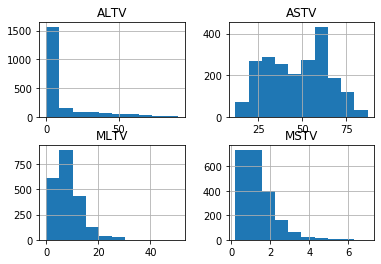

In [ ]:
ctgdata.iloc[:, 7:11].hist()

In [ ]:
corr=ctgdata[['AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']].corr()

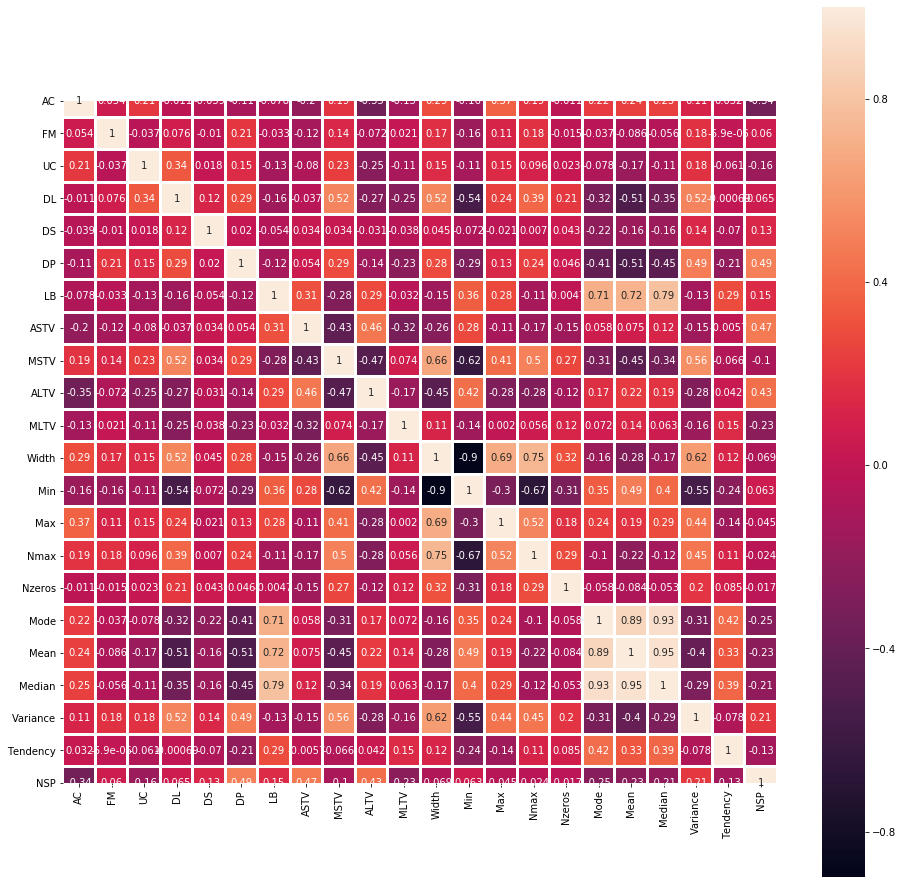

In [ ]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr, vmax=1, square=True,annot=True, linewidths= 2, ax=ax , cbar=True)
plt.show()

## **Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predict_train = model.predict(x_train)
print('Target on training data',predict_train[:100]) 

Target on training data [2 1 1 1 1 2 2 2 2 1 1 2 1 1 3 2 1 3 1 2 1 2 3 3 1 1 1 1 1 2 1 1 1 2 1 1 2
 1 2 1 1 1 1 1 2 2 2 3 1 1 2 2 1 2 2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1
 2 1 1 2 2 2 1 2 1 3 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 2]


In [ ]:
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on training dataset : ', accuracy_train)

accuracy_score on training dataset :  0.7885821831869511


In [ ]:
predict_test = model.predict(x_test)
print('Target on testing data',predict_test) 

Target on testing data [1 1 1 1 3 2 1 2 2 2 1 3 1 1 1 2 3 1 2 1 1 1 2 2 1 2 3 2 1 1 3 1 1 2 3 1 1
 3 2 2 1 2 1 1 1 2 1 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 3
 1 2 1 2 1 3 1 1 1 2 2 1 1 1 2 2 2 1 1 2 2 1 1 2 2 1 2 1 1 2 1 2 2 1 2 3 2
 2 1 2 2 2 1 1 2 3 2 2 1 1 3 3 3 1 2 1 3 1 1 2 1 1 1 1 2 2 2 1 3 1 3 1 1 2
 1 2 1 1 2 1 1 1 2 2 1 1 1 2 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 3 2
 1 1 1 3 2 2 2 3 2 1 3 1 1 1 2 2 1 1 2 2 1 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2
 1 1 1 1 2 1 1 2 2 3 2 1 3 2 2 1 1 1 1 1 1 1 2 3 1 1 3 2 1 1 2 1 2 1 1 1 1
 2 2 2 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 2 3 1 2 1 2 2 1 1 1 1 1 1 2 1 3
 3 1 3 1 1 1 1 1 3 1 2 1 1 2 1 1 1 1 2 3 1 3 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1
 1 2 2 1 1 1 1 2 2 2 3 2 3 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 2 2 1 1
 1 1 1 1 1 2 1 1 1 3 2 1 1 1 1 1 2 1 2 1 2 1 2 1 1 2 1 1 1 1 1 2 2 2 1 1 2
 1 1 1 2 1 2 1 1 1 1 2 1 1 1 2 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 1 1 3 2 1 2 1
 2 1 1 1 1 1 1 1 2 1 2 3 2 1 2 1 1 1 3 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 3 2
 2

**ACCURACY OF NAIVE BAYES ALGO**

In [ ]:
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on testing dataset : ', accuracy_test)

accuracy_score on testing dataset :  0.7894736842105263


In [ ]:
scores = cross_val_score(model,x_train,y_train,cv = 10)

In [ ]:
print(scores)

[0.73913043 0.80124224 0.775      0.79874214 0.80503145 0.74842767
 0.79245283 0.81132075 0.80503145 0.82911392]


In [ ]:
print(scores.mean())

0.7905492884166262


In [ ]:
print(scores.std())

0.026801390822381296


### **KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
KNNCTG = KNeighborsClassifier(4)

In [ ]:
KNNCTG.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
KNNCTG.predict(x_test[:10])

array([1, 1, 1, 1, 1, 3, 1, 3, 2, 2])

**ACCURACY OF KNN ALGORITHM**

In [ ]:
KNNCTG.score(x_test, y_test)

0.8872180451127819

In [ ]:
scores = cross_val_score(KNNCTG,x_train,y_train,cv = 10)

In [ ]:
print(scores)

[0.86956522 0.9068323  0.91875    0.89937107 0.88679245 0.87421384
 0.89308176 0.88679245 0.88050314 0.90506329]


In [ ]:
print(scores.mean())

0.8920965523648323


In [ ]:
print(scores.std())

0.01472311328831412


### **Decision Tree Algorithm 1**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
dectree = DecisionTreeClassifier()
dectree.fit(x_train,y_train)
clftree = GridSearchCV(dectree, 
                  {'criterion': ["gini","entropy"],
                   'max_depth':[5,6,7,8,10],
                    'min_samples_split':[2,3,4],
                    'max_leaf_nodes':[3,4,5,6,7,8]})
clftree.fit(x_train,y_train)
print(clftree.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_split': 2}


In [ ]:
clftree.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 10],
                

**ACCURACY OF DECISION TREE**

In [ ]:
print(clftree.best_score_)

0.9109159347553325


In [ ]:
scores = cross_val_score(clftree,x_train,y_train,cv = 10)

In [ ]:
print(scores)

[0.90062112 0.91304348 0.93125    0.90566038 0.89937107 0.89937107
 0.90566038 0.91194969 0.90566038 0.94936709]


In [ ]:
print(scores.mean())

0.912195464085573


In [ ]:
print(scores.std())

0.01528594882739077


In [ ]:
y_pred=clftree.predict(x_test)

In [ ]:
print("CLASSIFICATION REPORT \n",classification_report(y_pred,y_test))

CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96       427
           2       0.70      0.93      0.80        61
           3       0.97      0.82      0.89        44

    accuracy                           0.93       532
   macro avg       0.88      0.90      0.88       532
weighted avg       0.94      0.93      0.93       532



## **Decision Tree Algorithm 2**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
tree_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=4,
                                        min_samples_split=2)

In [ ]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**ACCURACY OF DECISION TREE**

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9304511278195489


In [ ]:
scores = cross_val_score(tree_model,x_train,y_train,cv = 10)

In [ ]:
print(scores)

[0.9068323  0.88198758 0.90625    0.89937107 0.91823899 0.89937107
 0.89937107 0.91194969 0.90566038 0.94936709]


In [ ]:
print(scores.mean())

0.9078399228534936


In [ ]:
print(scores.std())

0.01655698674556942


In [ ]:
y_pred=tree_model.predict(x_test)

In [ ]:
print("CLASSIFICATION REPORT \n",classification_report(y_pred,y_test))

CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96       425
           2       0.72      0.86      0.78        69
           3       0.95      0.92      0.93        38

    accuracy                           0.93       532
   macro avg       0.88      0.91      0.89       532
weighted avg       0.94      0.93      0.93       532



**Graphical Implementation of Decision Tree**

In [ ]:
import graphviz

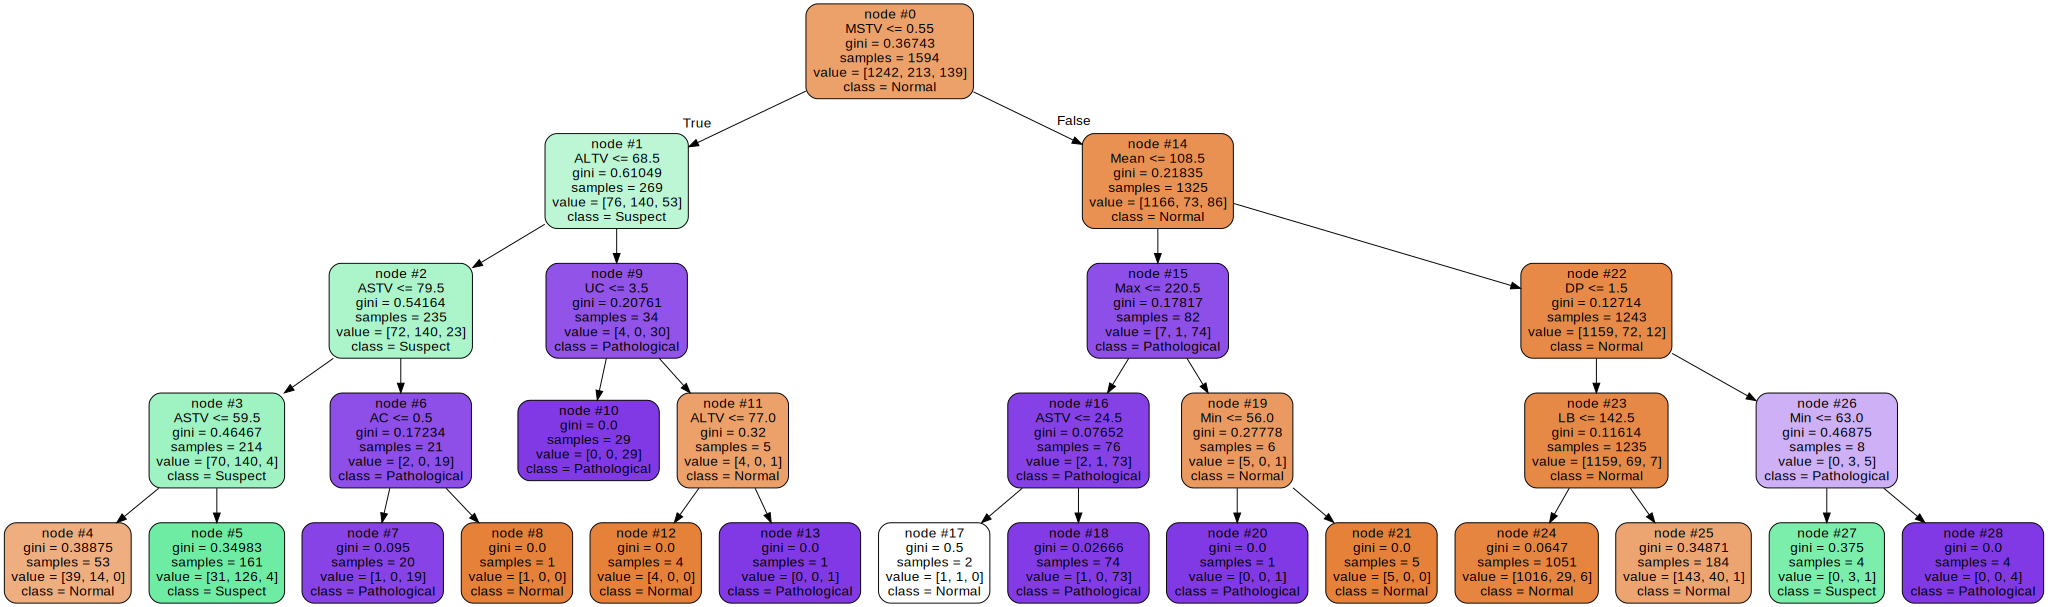

In [ ]:
dot_data = tree.export_graphviz( tree_model, feature_names=['AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency'],class_names=['Normal','Suspect','Pathological'], out_file=None, filled=True, node_ids=True, rotate=False, rounded=True, precision=5)  
graph=graphviz.Source(dot_data)
graph

## **Decision Tree with Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
CTGDTA = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=6,
                                        min_samples_split=2,
                                        max_leaf_nodes=5),
                                         algorithm="SAMME",
                                         n_estimators=100,learning_rate=0.3)

In [ ]:
CTGDTA.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=5,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                  

In [ ]:
y_pred=CTGDTA.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1,
       2, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**ACCURACY OF DECISION TREE WITH ADABOOST**

In [ ]:
accuracy_score(y_test,y_pred)

0.943609022556391

In [ ]:
scores = cross_val_score(CTGDTA,x_train,y_train,cv = 10)

In [ ]:
print(scores)

[0.94409938 0.9378882  0.9375     0.89937107 0.91823899 0.9245283
 0.94968553 0.91823899 0.94968553 0.93037975]


In [ ]:
print(scores.mean())

0.930961575214815


In [ ]:
print(scores.std())

0.015257516405529343


In [ ]:
print("CLASSIFICATION REPORT \n",classification_report(y_pred,y_test))

CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           1       0.97      0.96      0.97       416
           2       0.82      0.86      0.84        78
           3       0.95      0.92      0.93        38

    accuracy                           0.94       532
   macro avg       0.91      0.91      0.91       532
weighted avg       0.94      0.94      0.94       532



Confusion Matrix for Decision Tree with Adaboost

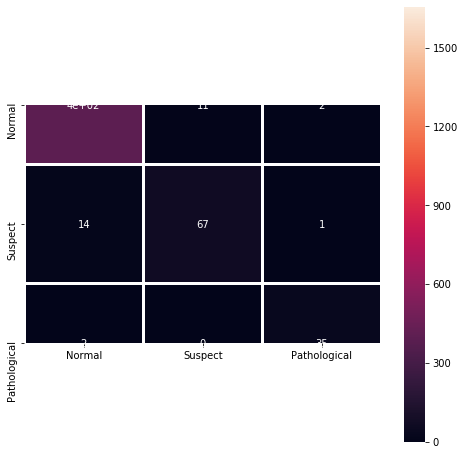

In [ ]:
conf = confusion_matrix(y_test, y_pred)
label = ["Normal","Suspect","Pathological"]
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, vmin=0, vmax=1655, linewidths=2, square=True, ax=ax )
plt.show()

## **SVM Algorithm**

In [ ]:
from sklearn import svm

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
CTGSUP = svm.LinearSVC(random_state=20)

In [ ]:
CTGSUP.fit(x_train, y_train)
CTGPRED= CTGSUP.predict(x_test)
score=accuracy_score(y_test,CTGPRED)

**ACCURACY OF SVM**

In [ ]:
print("Your Model Accuracy is", score)

Your Model Accuracy is 0.881578947368421


In [ ]:
scores = cross_val_score(CTGSUP,x_train,y_train,cv = 10)

In [ ]:
print(scores)

[0.86956522 0.8447205  0.825      0.86792453 0.8427673  0.85534591
 0.83647799 0.8490566  0.86163522 0.84177215]


In [ ]:
print(scores.mean())

0.8494265413354259


In [ ]:
print(scores.std())

0.013495823394567527


## **Feature Reduction on Decision Tree with Adaboost**

**Greedy Stepwise Feature Reduction Algo**

In [ ]:
ctgdatags =  pd.read_csv('best_fit_CTG_Data.csv')

In [ ]:
ctgdatags

,AC,DS,DP,ASTV,NSP
0,0,0,0,73,2
1,4,0,0,17,1
2,2,0,0,16,1
3,2,0,0,16,1
4,4,0,0,16,1
...,...,...,...,...,...
2121,0,0,0,79,2
2122,1,0,0,78,2
2123,1,0,0,79,2
2124,1,0,0,78,2


In [ ]:
X = ctgdatags.drop(['NSP'],axis =1)
y = ctgdatags['NSP'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
CTGDTA = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=6,
                                        min_samples_split=2,
                                        max_leaf_nodes=5),
                                         algorithm="SAMME",
                                         n_estimators=100,learning_rate=0.3)

In [ ]:
CTGDTA.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=5,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                                  

In [ ]:
CTGDTA.score(x_test,y_test)

0.868421052631579

# ***FINISH***